# Individual Project Planning Report
## By Jialin Zhang (67647826)
## DSCI 100 Sec 009 Group 10

## 1. Data Description

### (1) The descriptive summary of the **players** dataset:

* **Number of observations**: The players dataset has 196 observations. 
* **Number of variables**: The players dataset has 9 variables. 
* **Name, type and meanings of variables**: The players dataset contains the following variables:
    * experience (character): It represents the player's skill level in the game. There are five different skill levels, and from least to most skilled, the order should be: beginner, amateur, regular, veteran, pro. 
    * subscribe (logical): It represents whether the player has subscribed to this study. TRUE means “subscribed”, and FALSE means “not subscribed”.
    * hashedEmail (character): It represents an email address processed through a hashing algorithm. To protect player privacy, the actual email address is converted into a string, preventing the exposure of the player's email address. Here, it also serves as the primary key to associate the two dataset. 
    * played_hours (numeric): It represents the hours the player spent on the game. 
    * name (character): It represents the player's name in the game. 
    * gender (character): It represents the player's gender in the game. There are seven types: Male, Female, Non-binary, Two-spirited, Agender, Other, Prefer not to say. 
    * age (numeric): It represents the player's age. 
    * individualId (logical): It represents the player's individual id. In the dataset, this variable is empty. 
    * organizationName (logical): It represents the player's organization name. In the dataset, this variable is empty. 
* **Some issues I see in the data**:
    * Two variables, individualId and organizationName, are empty.
    * Some players may have entered a false age. For example, one player claims to be 91 years old. This could lead to bias in the study.
    * The experience level entered by players may not be entirely accurate, because it is their own estimate. Some players may actually be at a higher or lower level than what they indicated.
    * Some players prefer not to say their gender. As a result, the dataset has a small portion of missing gender information.
    * The gender distribution among players is unbalanced. A large proportion of registered players are male, while female and other gender representations are limited, which may introduce bias into the study.
* **How the data were collected**: The data comes from the personal information provided by players when they register on the server.
* **The variables I want to choose**: We want to understand which kinds of players are most likely to contribute a large amount of data, which are those who play for longer hours. Therefore, I may to select these variables: experience, subscribe, hashedEmail, played_hours, gender, age. individualId and organizationName are empty, so I exclude them. Name is unlikely to affect played hours, so I exclude it as well.

### (2) The descriptive summary of the **sessions** dataset:

* **Number of observations**: The sessions dataset has 1535 observations. 
* **Number of variables**: The sessions dataset has 5 variables. 
* **Name, type and meanings of variables**: The sessions dataset contains the following variables:
    * hashedEmail (character): It represents an email address processed through a hashing algorithm. To protect player privacy, the actual email address is converted into a string, preventing the exposure of the player's email address. Here, it also serves as the primary key to associate the two dataset. 
    * start_time (character): It represents the time the player started the game on the server, in character format. 
    * end_time (character): It represents the time the player ended the game on the server, in character format. 
    * original_start_time (numeric): It represents the time the player started the game on the server, in unix timestamp format. 
    * original_end_time (numeric): It represents the time the player endeded the game on the server, in unix timestamp format. 
* **Some issues I see in the data**:
    * The original_start_time and original_end_time are recorded in unix timestamp and scientific notation. Transfering them into format such as minutes or hours are more readable and understandable. 
* **How the data were collected**: The data comes from the time each player spent on a single game session.
* **The variables I want to choose**: I may to select hashedEmail, orginal_start_time and original_end_time. start_time and end_time are in character format, which are inconvenient for me to calculate played time per session. 

## 2. Question

Our Group will focus on Question 1: 
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

First, we would merge the two dataset. Then, we can set a threshold for played_hours, i.e., five hours. Players who played more than five hours would be considered as those who can contribute a large amount of data. We can add a label to all players, which is a new column called contribution. Players who played more than five hours are "High" contributors, while those who played less than five hours are "Low" contributors. In this case, the response variable would be the new column called contribution, and explanatory variables would be experience, subscribe, gender, age, and the difference between original_start_time and original_end_time. 

## 3. Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load the datasets into R

players <- read_csv("data/players.csv")
head(players)

sessions <- read_csv("data/sessions.csv")
head(sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [3]:
# Combine the two datasets. 
total_players <- merge(players, sessions, by = "hashedEmail", all = TRUE)
head(total_players)

,hashedEmail,experience,subscribe,played_hours,name,gender,age,individualId,organizationName,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,NA,NA,23/05/2024 00:22,23/05/2024 01:07,1.71642e+12,1.71643e+12
2,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,NA,NA,22/05/2024 23:12,23/05/2024 00:13,1.71642e+12,1.71642e+12
3,055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA,NA,NA,NA,NA
4,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,NA,NA,28/06/2024 04:28,28/06/2024 04:58,1.71955e+12,1.71955e+12
5,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,NA,NA,19/09/2024 21:01,19/09/2024 21:12,1.72678e+12,1.72678e+12
6,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,NA,NA,30/08/2024 03:40,30/08/2024 04:04,1.72499e+12,1.72499e+12


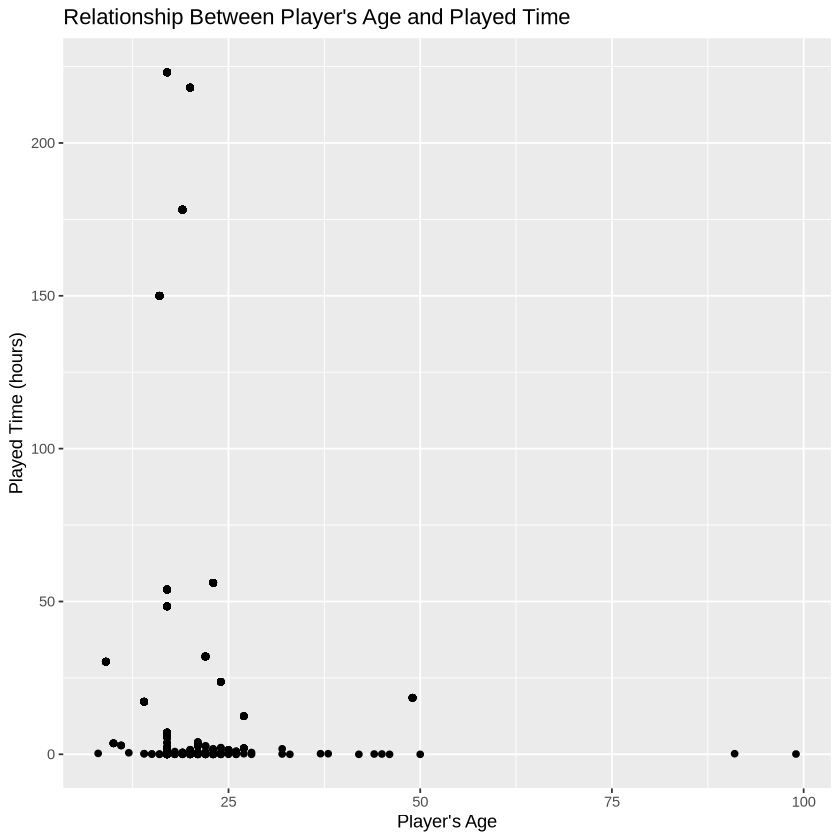

In [4]:
# Make a scatter plot based on played_hours and age
total_players |>
ggplot(aes(x = age, y = played_hours)) +
geom_point() +
labs(x = "Player's Age", y = "Played Time (hours)", title = "Relationship Between Player's Age and Played Time")

From this chart, we can see that most players are between 15 and 35 years old. Among them, players aged 15 to 25 have the longest playtime. This suggests that age may be related to played_hours (i.e., the amount of data contributed).

experience,avg_hours
<chr>,<dbl>
Amateur,63.409750
Beginner,6.665546
Pro,19.661905
Regular,180.801692
Veteran,2.411111


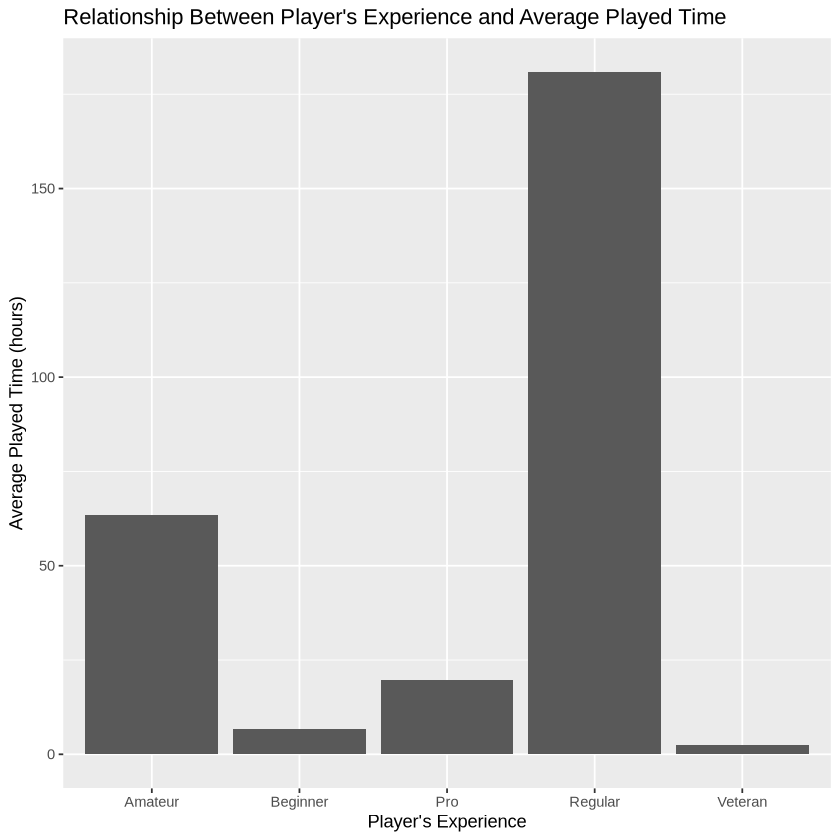

In [5]:
# Make a bar chart based on played_hours and experience
player_exp <- total_players |>
group_by(experience) |>
summarize(avg_hours = mean(played_hours))
player_exp

player_exp |>
ggplot(aes(x = experience, y = avg_hours)) +
geom_bar(stat = "identity") +
labs(x = "Player's Experience", 
     y = "Average Played Time (hours)", 
     title = "Relationship Between Player's Experience and Average Played Time")

From this chart, we can see that players with different game experiences contribute different length of played hours. Therefore, experience might be a variable that influences played_hours (i.e., the amount of data contributed). 

gender,avg_hours
<chr>,<dbl>
Agender,11.36363636
Female,131.33215190
Male,74.38172348
Non-binary,183.47079646
Other,0.20000000
Prefer not to say,1.06250000
Two-Spirited,0.08333333


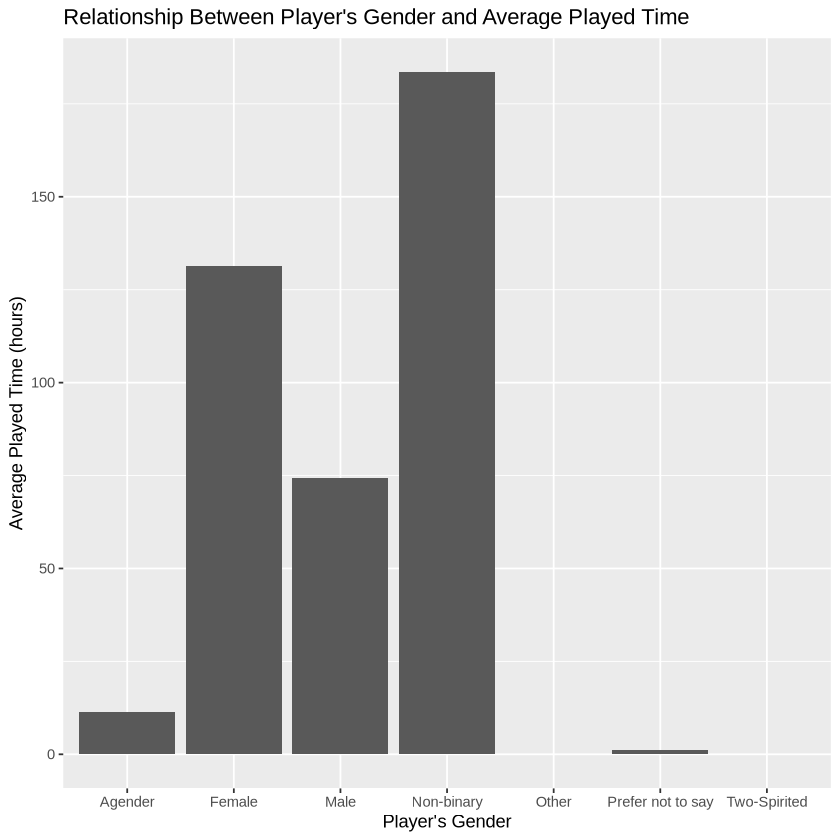

In [6]:
# Make a bar chart based on played_hours and gender
player_gender <- total_players |>
group_by(gender) |>
summarize(avg_hours = mean(played_hours))
player_gender

player_gender |>
ggplot(aes(x = gender, y = avg_hours)) +
geom_bar(stat = "identity") +
labs(x = "Player's Gender", 
     y = "Average Played Time (hours)", 
     title = "Relationship Between Player's Gender and Average Played Time")

From this chart, we can see that players of different genders contribute different length of played hours. Gender might also be a variable that influences playtime (i.e., the amount of data contributed).

## 4. Methods and Plan

* I will use knn classification to predict what kinds of players would contribute a lot of data. The response variable would be a new column called contribution, and explanatory variables would be experience, subscribe, gender, age, and the difference between original_start_time and original_end_time. I will merge the two dataset, select all the columns I need, and then standardize all the numeric data.
* knn-classification is useful when determine the classification based on similarity, which aligns well with our goal of identifying the types of players that will contribute a lot of game data. 
* I would assume that all players have provided accurate information, with no errors. 
* The weakness of knn classification is that the model is sensitivity to outliers and irrelevant features.
* To process the data, I plan to use 5-fold cross validation. I will evenly split the data into 5 parts. Then, I will iteratively use 1 chunk as the validation set and combine the remaining 4 chunks as the training set. The training set is used for training the classification and regression model, while the testing set is used to evaluate the model’s performance, ensuring it generalizes well to new data.
* Then, I will find out the best value of the number of neighbors. 